In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("/Users/karananand/ML_Project/notebook/data/stud.csv")

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X = df.drop('math_score', axis= 1)
y = df['math_score']

#### Transformation

In [5]:
## Column Transformers:
num_columns = [col for col in X.columns if X[col].dtypes != 'O']
cat_columns = [col for col in X.columns if X[col].dtypes == 'O']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_columns),
        ('StandardScaler',num_transformer,num_columns)
    ]
)


In [6]:
X = preprocessor.fit_transform(X)

In [7]:
X.shape

(1000, 19)

#### Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

#### Evaluation Metrics & Models

In [9]:
def evaluate_metrics(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [10]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    ## Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluation
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_metrics(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_metrics(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    # print('Model performance for Training set')
    # print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    # print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    # print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')





LinearRegression
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3573
- Mean Absolute Error: 4.1803
- R2 Score: 0.8821


Lasso
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


DecisionTree
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8291
- Mean Absolute Error: 6.1850
- R2 Score: 0.7481


Random Forest Regressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0088
- Mean Absolute Error: 4.7101
- R2 Score: 0.8516


XGBRegre

In [11]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model","R2_Score"]).sort_values("R2_Score",ascending=False)

,Model,R2_Score
0,LinearRegression,0.882056
2,Ridge,0.880593
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851625
8,AdaBoost Regressor,0.847586
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTree,0.748108


#### Linear Regression

In [12]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)

lr_predicted = lin_model.predict(X_test)
r2_score = r2_score(y_test,lr_predicted)
r2_score

0.8820558858312129

<Axes: xlabel='math_score'>

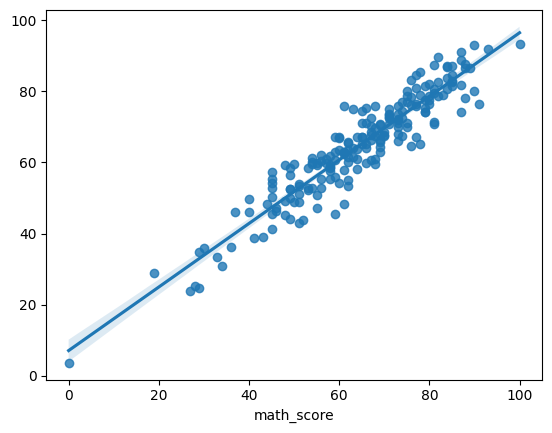

In [16]:
sns.regplot(x = y_test, y = lr_predicted)

In [27]:
df.math_score.isna().sum()

0